In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-analyst-jobs-dataset/DataAnalyst.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

warnings.filterwarnings('ignore')


In [3]:
data_analyst_jobs=pd.read_csv('/kaggle/input/data-analyst-jobs-dataset/DataAnalyst.csv')

Dataset Overview  
 The over view is prepared to get the feel on data structure. It will also include a quick
analysis on missing values, basic statistics and data manipulation.  
 The dataset consists of the following information  
 ● JobTitle :A name that describes someone's job or position.  
 ● Salary Estimate: A display a range for annual base or hourly pay and are
 specific to Data Analytics Industry  
 ● JobDescription: The plain-language tool that explains the tasks, duties,
 function and responsibilities of a position    
 ● Rating : Company Rating  
 ● CompanyName:Thenameof the company  
 ● Location: The location where the job is available  
 ● Headquarters: The headquarters of the company  
 ● Size: The size of the employee  
 ● Typeof Ownership: Type of ownership whether it is public, private or
 non-profit  
 ● Industry: Different industries where the job is available  
 ● Sector: Sector where the job is available  
 ● Revenue: Company earnings annually.  
 ● EasyApply: Easy Apply section  
 ● Observations  
 ● There are 2253 rows and 13 columns and 1 missing values  

In [4]:
data_analyst_jobs = data_analyst_jobs.drop('Unnamed: 0',axis=1)
data_analyst_jobs = data_analyst_jobs.drop('Founded', axis=1)
data_analyst_jobs = data_analyst_jobs.drop('Competitors',axis=1)
print(f'Numberofrows:{data_analyst_jobs.shape[0]};Numberofcolumns:{data_analyst_jobs.shape[1]};Noofmissingvalues:{sum(data_analyst_jobs.isna().sum())}')

Numberofrows:2253;Numberofcolumns:13;Noofmissingvalues:1


 Below is the first 5 rows of data analyst jobs dataset

In [5]:
 data_analyst_jobs.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),TRUE
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,-1
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),TRUE


In [6]:
data_analyst_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2253 non-null   object 
 1   Salary Estimate    2253 non-null   object 
 2   Job Description    2253 non-null   object 
 3   Rating             2253 non-null   float64
 4   Company Name       2252 non-null   object 
 5   Location           2253 non-null   object 
 6   Headquarters       2253 non-null   object 
 7   Size               2253 non-null   object 
 8   Type of ownership  2253 non-null   object 
 9   Industry           2253 non-null   object 
 10  Sector             2253 non-null   object 
 11  Revenue            2253 non-null   object 
 12  Easy Apply         2253 non-null   object 
dtypes: float64(1), object(12)
memory usage: 228.9+ KB


Data Manipulation   
 Some of the data in your dataset needed to be moved around in order to make it easier for you to analyze it. For example, you might want to rename some columns in your dataset. You also want to avoid duplicates or other redundancies on your dataset.

 
 Renaming Columns for Better Analysis  
 The columns are renamed for easier analysis

In [7]:
data_analyst_jobs.rename(columns={"Job Title": "job_title"},inplace=True)
data_analyst_jobs.rename(columns={"Salary Estimate":"salary_estimate"}, inplace=True)
data_analyst_jobs.rename(columns={"Job Description":"job_description"}, inplace=True)
data_analyst_jobs.rename(columns={"Company Name":"company_name"}, inplace=True)
data_analyst_jobs.rename(columns={"Location": "location"},inplace=True)
data_analyst_jobs.rename(columns={"Headquarters":"headquarters"}, inplace=True)
data_analyst_jobs.rename(columns={"Size": "size"},inplace=True)
data_analyst_jobs.rename(columns={"Type of ownership":"type_of_ownership"}, inplace=True)
data_analyst_jobs.rename(columns={"Industry": "industry"},inplace=True)
data_analyst_jobs.rename(columns={"Sector":"sector"},inplace=True)
data_analyst_jobs.rename(columns={"Revenue":"revenue"},inplace=True)
data_analyst_jobs.rename(columns={"EasyApply":"easy_apply"},inplace=True)
 

In [8]:
data_analyst_jobs.head()

,job_title,salary_estimate,job_description,Rating,company_name,location,headquarters,size,type_of_ownership,industry,sector,revenue,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),TRUE
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,-1
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),TRUE


JobTitle  
 The job title column on the dataset showed duplicated job titles that would inhibit a proper analysis.The names were replaced to avoid duplicates.  
 Observations:  
 The top 5 jobs in the dataset are as follows.    
 ● DataAnalyst that has a value of 405  
 ● Senior Data Analyst that has a value of 131  
 ● Junior Data Analyst that has a value of 58  
 ● Business Data Analyst that has a value of 28  
 ● Data Quality Analyst that has a value of 17  

In [9]:
# Replace various senior job title variants with a standardized title
data_analyst_jobs['job_title'] = data_analyst_jobs['job_title'].replace(
    ['Sr. Data Analyst', 'sr. data analyst', 'Sr Data Analyst', 'sr dataanalyst',
     'senior data analyst', 'Senior Data Analyst', 'DataAnalyst III',
     'data analyst iii', 'senior data analyst'],
    'Senior Data Analyst', regex=True
)

# Replace junior variants
data_analyst_jobs['job_title'] = data_analyst_jobs['job_title'].replace(
    ['Data Analyst I', 'dataanalyst i', 'Data Analyst Junior', 'data analyst junior',
     'Junior DataAnalyst', 'Junior Data AnalystI', 'Junior Data Analystl'],
    'Junior Data Analyst', regex=True
)

# Replace mid-level variants
data_analyst_jobs['job_title'] = data_analyst_jobs['job_title'].replace(
    ['Data Analyst II', 'data analyst ii', 'Middle Data Analyst'],
    'Mid-Level Data Analyst', regex=True
)


In [10]:
to_plot = data_analyst_jobs.job_title.value_counts()[:5]
 # ax = to_plot.plot(kind='bar',color=sns.color_palette('Spectral'))
to_plot


job_title
Data Analyst             405
Senior Data Analyst      120
Junior Data Analyst       58
Business Data Analyst     28
Junior Data AnalystI      17
Name: count, dtype: int64

5 Salary  Estimate  and Trends  
 The salary estimation column is an item and needs to be converted into a float  
 column for a better analysis.To change the column, extract the minimum and
 maximum salary, convert them to a float column and drop the columns that are not relevant

In [11]:
 data_analyst_jobs[['MinSalary', 'MaxSalary']] =data_analyst_jobs['salary_estimate'].str.extract(r'\$(\d+)K-\$(\d+)K')
 data_analyst_jobs['MinSalary'] =pd.to_numeric(data_analyst_jobs['MinSalary'])
 data_analyst_jobs['MaxSalary'] =pd.to_numeric(data_analyst_jobs['MaxSalary'])

In [12]:
# Ensure the salary columns exist before proceeding
if {'MinSalary', 'MaxSalary'}.issubset(data_analyst_jobs.columns):
    # Convert to float safely
    data_analyst_jobs['MinSalary'] = pd.to_numeric(data_analyst_jobs['MinSalary'], errors='coerce')
    data_analyst_jobs['MaxSalary'] = pd.to_numeric(data_analyst_jobs['MaxSalary'], errors='coerce')

    # Calculate average salary
    data_analyst_jobs['average_salary'] = (data_analyst_jobs['MaxSalary'] + data_analyst_jobs['MinSalary']) / 2

    # Drop columns if they exist
    cols_to_drop = [col for col in ['salary_estimate', 'MinSalary', 'MaxSalary'] if col in data_analyst_jobs.columns]
    data_analyst_jobs.drop(cols_to_drop, axis=1, inplace=True)
else:
    print("One or more salary columns are missing.")


AverageSalary  
 Observations:  
 The average salary for data analysts jobs is between 60K-80K annually with a minimim of 40K and a maximum of 140K.  

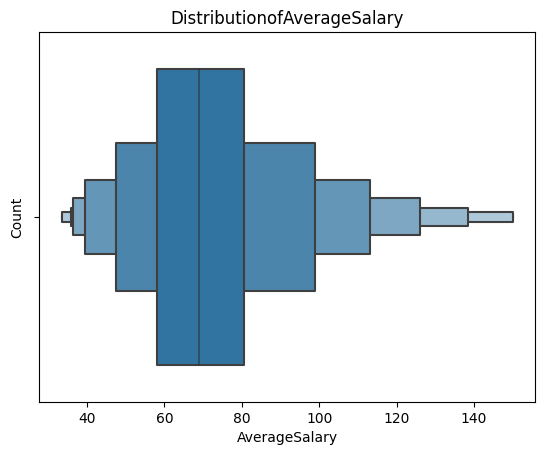

In [13]:
sns.boxenplot(data=data_analyst_jobs,x='average_salary')
plt.xlabel('AverageSalary')
plt.ylabel('Count')
plt.title('DistributionofAverageSalary')
plt.show()


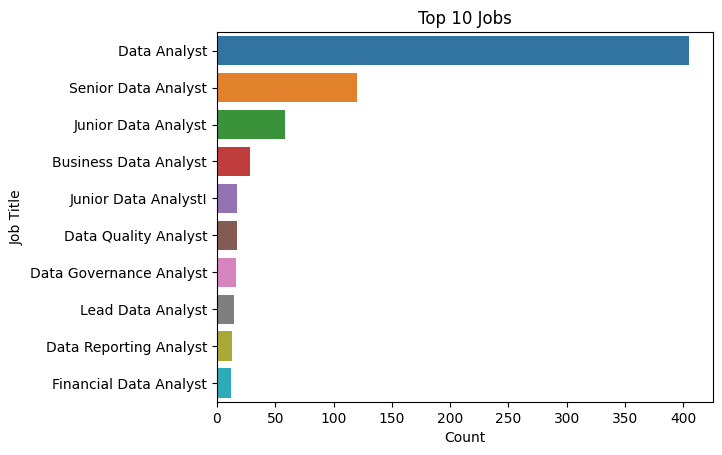

In [14]:
 top_jobs =data_analyst_jobs['job_title'].value_counts().head(10)
 sns.barplot(x=top_jobs.values, y=top_jobs.index)
 plt.xlabel('Count')
 plt.ylabel('Job Title')
 plt.title('Top 10 Jobs')
 plt.show()


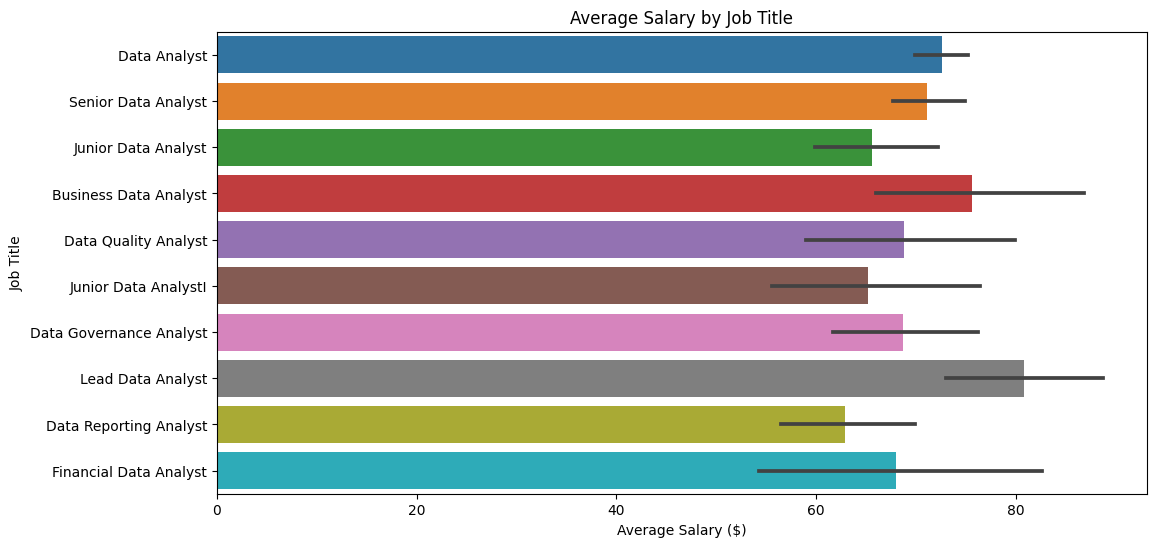

In [15]:
 data_analyst_jobs_sorted =data_analyst_jobs.sort_values(by='average_salary',ascending=False)
 plt.figure(figsize=(12, 6))
 sns.barplot(x='average_salary', y='job_title',
 data=data_analyst_jobs_sorted, orient='h',
 order=data_analyst_jobs_sorted['job_title'].value_counts().head(10).index)
plt.xlabel('Average Salary ($)')
 plt.ylabel('Job Title')
 plt.title('Average Salary by Job Title')
 plt.show()

 Average Salary by Job Title  
 1. Data Analyst  
 2. Senior Data Analyst  
 3. Junior Data analyst  
 4. Business Data Analyst  
 5. Data Quality Analyst  
 6. Junior Data Analyst  
7. Data Governance Analyst  
 8. Lead Data Analyst  
 9. Data Reporting Analyst  
 10. Financial Analyst  
 Observations  
 The dataset shows that there is a massive demand for Data Analysts in the industry.
 There is a huge gap in job availability between the positions of Data Analyst and
 Senior Data Analyst, which are the two most sought-after positions in the
 industry.When it comes to salary, Data Analysts are paid on an average between
 60,000-80,000 per year. The dataset also shows that the highest-paying job in the
 industry is Lead Data Analyst, which pays above 80,000 per year but lacks job
 availability.
 (to see the details, please expand)

In [16]:
 job_location =data_analyst_jobs.groupby('location')["average_salary"].mean().reset_index()
 top_10 = job_location.sort_values(by = "average_salary",
 ascending=False).head(10)


In [17]:
fig = px.bar(top_10, x='average_salary', y='location',orientation='h', title='Salary Trends by Location', color ="location")
fig.update_layout(xaxis_title='AVG Salary (USD)',yaxis_title='Location', showlegend = False)
fig.show()

 020406080100120140Glenview, ILElk Grove Village, ILNorthfield,
 ILBerkeley, CAWhittier, CAPico Rivera, CALos Gatos, CAMarin City, CADaly
 City, CANewark, CA  
 Salary Trends by LocationAVG Salary (USD)Location  
 5.2.1 Top Locations Based on Average Salary  
 Top 5 Locations and Headquarters  
 ● NewYork, NY  
 ● Chicago, IL  
 ● SanFranciso,CA  
 ● Austin,TX  
 ● LosAngeles CA  
Top 5 Locations by Salary  
 ● Newark, CA  
 ● Daly City, CA  
 ● Marin City, CA  
 ● Los, Gatos, CA,  
 ● Pico Rivera, CA    
 Observations  
 The dataset showed that the top locations and headquarters are the same.   The job openings in New York is significantly higher compare to the job in Chicago.  
 Looking at the salary correlation the top 5 locations that has a higher salary are all located in California

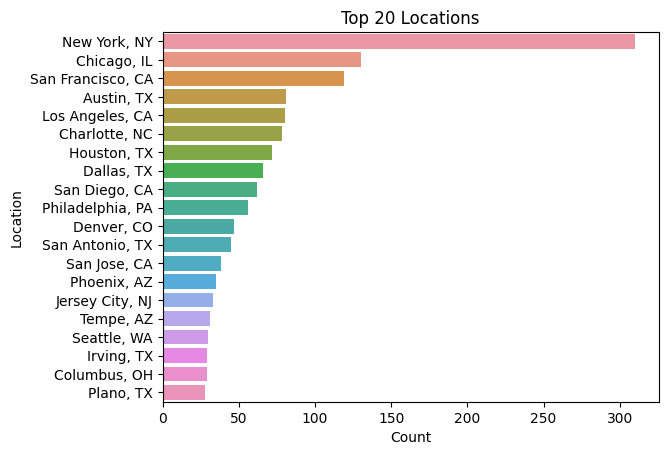

In [18]:
 top_locations =data_analyst_jobs['location'].value_counts().head(20)
 sns.barplot(x=top_locations.values, y=top_locations.index)
 plt.xlabel('Count')
 plt.ylabel('Location')
 plt.title('Top 20 Locations')
 plt.show()


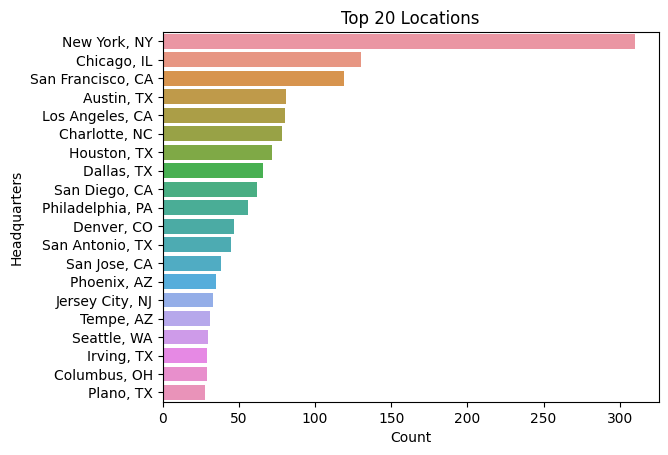

In [19]:
 top_headquarters =data_analyst_jobs['headquarters'].value_counts().head(20)
 sns.barplot(x=top_locations.values, y=top_locations.index)
 plt.xlabel('Count')
 plt.ylabel('Headquarters')
 plt.title('Top 20 Locations')
 plt.show()


6 Company  
 These are the focus areas of the analysis.  
 ● 6.1 Average Salary by Company Size  
 ● 6.2 Company Rating  
 ● 6.3 Type of Ownership  
6.1 Average Salary by Company Size  
 The company that has a biggest size which is around 5001-10000 employees has the smallest count. The company that has the highest count has around 51-200 employees. The smallest company size has a count of 350 and it's the same as the company that has around 1000- 5000 employees. There is no significant difference between the company size and average salary in the dataset.  
 Observations  
 Based on the data, there are not a lot of companies that has 5000-10000 employees
 in the Data Analytics Industry. On the other hand the company that has more that
 10000 employees has more than 350 which falls on 2nd place. The company size
 that has the most value counted is the company that has 51-200

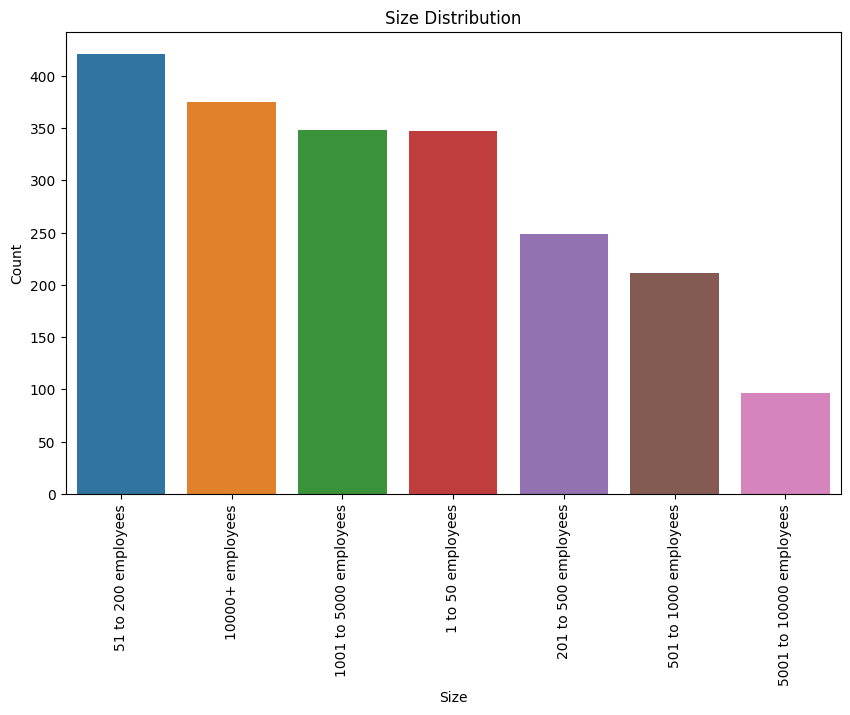

In [20]:
# Filter out unwanted size values
filtered_size = data_analyst_jobs[(data_analyst_jobs['size'] != '-1') & (data_analyst_jobs['size'] != 'Unknown')]

# Get the top 20 most common sizes
data_analyst_jobs_size = filtered_size['size'].value_counts().head(20)

# Plot the size distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=data_analyst_jobs_size.index, y=data_analyst_jobs_size.values)
plt.xlabel('Size')
plt.ylabel('Count')
plt.title('Size Distribution')
plt.xticks(rotation=90)
plt.show()


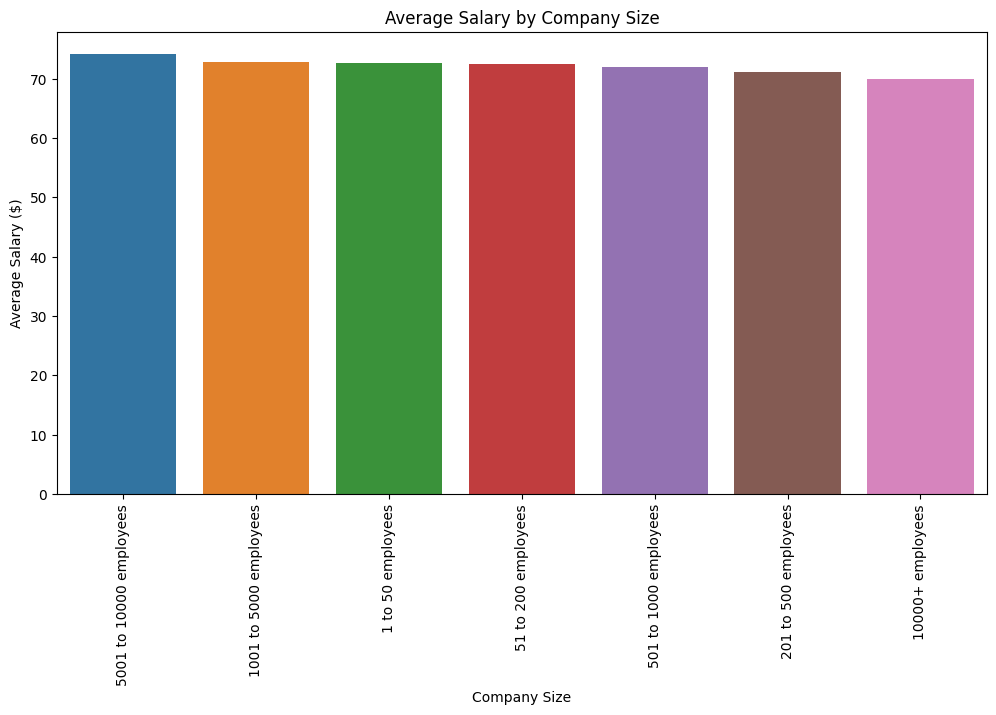

In [21]:
# Filter out rows with invalid size values
data_analyst_jobs_filtered = data_analyst_jobs[(data_analyst_jobs['size'] != '-1') & 
                                               (data_analyst_jobs['size'] != 'Unknown')]

# Group by company size and calculate average salary
data_analyst_jobs_sizeXsalary = data_analyst_jobs_filtered.groupby('size')['average_salary'].mean().reset_index()

# Sort by average salary in descending order
data_analyst_jobs_sizeXsalary = data_analyst_jobs_sizeXsalary.sort_values(by='average_salary', ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='size', y='average_salary', data=data_analyst_jobs_sizeXsalary)
plt.xlabel('Company Size')
plt.ylabel('Average Salary ($)')
plt.title('Average Salary by Company Size')
plt.xticks(rotation=90)
plt.show()


. Company Rating  
 The rating shows that the rating is between 3.0- 4.0 meaning that there is a data analyst jobs rating is fairly average.

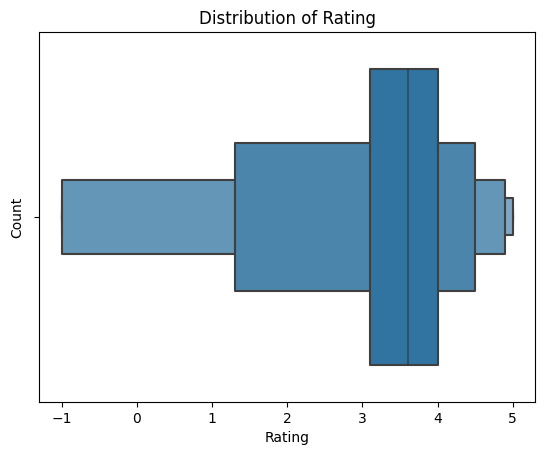

In [22]:
sns.boxenplot(data=data_analyst_jobs, x='Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Rating')
plt.show()

3 Type of Ownership  
 A significant amount of data falls on the Private sector, followed by public sector

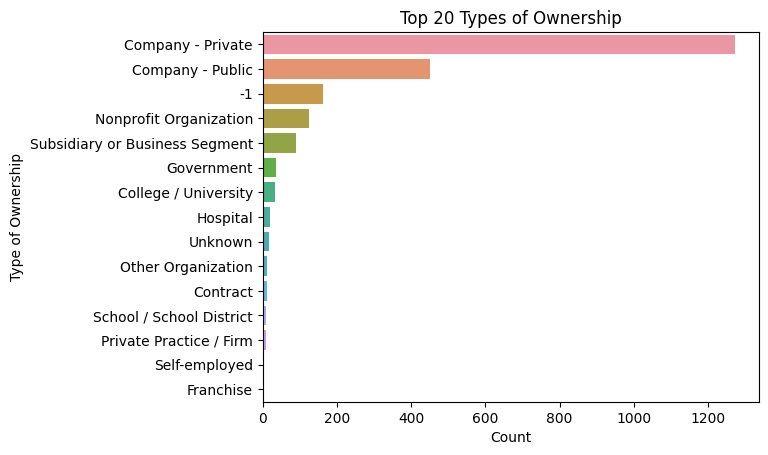

In [23]:
 TOP = data_analyst_jobs[(data_analyst_jobs['type_of_ownership']!= '-1') & (data_analyst_jobs['type_of_ownership'] !='Unknown')]
 TOP =data_analyst_jobs['type_of_ownership'].value_counts().head(20)
 sns.barplot(x=TOP.values, y=TOP.index)
 plt.xlabel('Count')
 plt.ylabel('Type of Ownership')
 plt.title('Top 20 Types of Ownership')
 plt.show()


 Top Sectors  
 This dataset shows two sets of data. One is the top sector distribution and the other one is in correlation with the Average Salary.  
 Top 5 Sectors Distribution Where Data Analyst Jobs are available  
 1. Information Technology  
 2. Business Services  
 3. Finance  
 4. Health Care  
 5. Education  

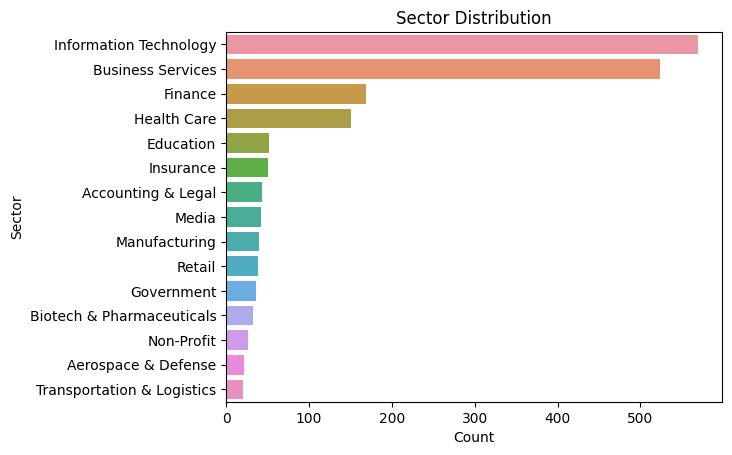

In [24]:
 data_analyst_jobs_sector =data_analyst_jobs[data_analyst_jobs['sector'] !='-1']['sector'].value_counts().head(15)
 sns.barplot(x=data_analyst_jobs_sector.values,
 y=data_analyst_jobs_sector.index)
 plt.xlabel('Count')
 plt.ylabel('Sector')
plt.title('Sector Distribution')
 plt.show()

7.2 Average Salary by Sector  
 Top Sectors in Correlation with Average Salary  
 1. Biotech & Pharmaceuticals  
 2. Real Estate  
 3. Art, Entertainment & Recreation 
 4. Accounting & Legal  
 5. Information Technology  
Observations  
 Information Technology and Business Services dominated the sector distribution. On the contrary, in correlation with the average salary, the information technology only fell at the 5th place where the average salary is between 70K-75K annually. Biotech & Pharmaceuticals showed that this sector is the highest paying sector which pays
 more than 80K annually.  
 The graph showed very distinct difference betweent the sector distribution and average salary by sector.

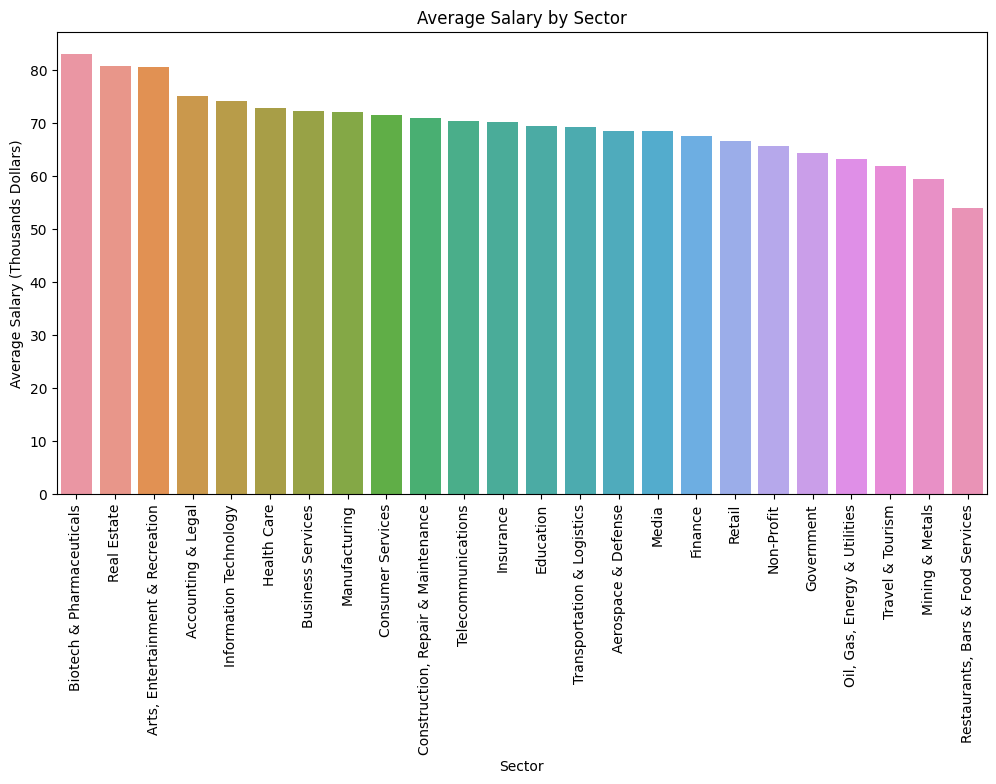

In [25]:
 average_salary_by_sector =data_analyst_jobs[data_analyst_jobs['sector'] !='-1'].groupby('sector')['average_salary'].mean().reset_index()
 average_salary_by_sector =average_salary_by_sector.sort_values(by='average_salary',ascending=False)
 plt.figure(figsize=(12, 6))
 sns.barplot(x='sector', y='average_salary',
 data=average_salary_by_sector)
 plt.xticks(rotation=90)
 plt.xlabel('Sector')
 plt.ylabel('Average Salary (Thousands Dollars)')
plt.title('Average Salary by Sector')
 plt.show()